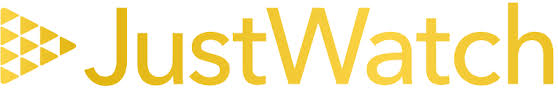

## **JustWatch Movies & TV Shows  Web Scraping**



### **Website:**
JustWatch -  https://www.justwatch.com/


### **Description:**

JustWatch is a popular platform that allows users to search for movies and TV shows across multiple streaming services like Netflix, Amazon Prime, Hulu, etc. For this assignment, you will be required to scrape movie and TV show data from JustWatch using Selenium, Python, and BeautifulSoup. Extract data from HTML, not by directly calling their APIs. Then, perform data filtering and analysis using Pandas, and finally, save the results to a CSV file.

### **Tasks:**

**1. Web Scraping:**

Use BeautifulSoup to scrape the following data from JustWatch:

   **a. Movie Information:**

      - Movie title
      - Release year
      - Genre
      - IMDb rating
      - Streaming services available (Netflix, Amazon Prime, Hulu, etc.)
      - URL to the movie page on JustWatch

   **b. TV Show Information:**

      - TV show title
      - Release year
      - Genre
      - IMDb rating
      - Streaming services available (Netflix, Amazon Prime, Hulu, etc.)
      - URL to the TV show page on JustWatch

  **c. Scope:**

```
 ` - Scrape data for at least 50 movies and 50 TV shows.
   - You can choose the entry point (e.g., starting with popular movies,
     or a specific genre, etc.) to ensure a diverse dataset.`

```


**2. Data Filtering & Analysis:**

   After scraping the data, use Pandas to perform the following tasks:

   **a. Filter movies and TV shows based on specific criteria:**

   ```
      - Only include movies and TV shows released in the last 2 years (from the current date).
      - Only include movies and TV shows with an IMDb rating of 7 or higher.
```

   **b. Data Analysis:**

   ```
      - Calculate the average IMDb rating for the scraped movies and TV shows.
      - Identify the top 5 genres that have the highest number of available movies and TV shows.
      - Determine the streaming service with the most significant number of offerings.
      
   ```   

**3. Data Export:**

```
   - Dump the filtered and analysed data into a CSV file for further processing and reporting.

   - Keep the CSV file in your Drive Folder and Share the Drive link on the colab while keeping view access with anyone.
```

## **Task 1:- Web Scraping**

In this web scraping project, I utilized Python's BeautifulSoup and requests libraries to extract information about movies and tv show from the JustWatch website. The process involved scraping details such as  titles, release years, genres, IMDb ratings, age ratings, durations, production countries, streaming service providers, and URLs for both Movies and Tv Shows. I navigated through the HTML structure of the web pages, identifying key elements and their classes to locate the desired information. The code snippets include iterations through lists of movie and TV show URLs, finding specific HTML tags and classes, handling different scenarios such as missing data, and storing the extracted information in Python lists. Subsequently, the data was organized into a Pandas DataFrame, allowing for easy manipulation and analysis. The final DataFrame includes essential details about each movie and TV show, providing a comprehensive dataset for further exploration and insights.

In [ ]:
#Installing all necessary labraries
!pip install bs4
!pip install requests

In [112]:
#import all necessary labraries
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np

## **Scrapping Movies Data**

In [ ]:
# Specifying the URL from which movies related data will be fetched
url='https://www.justwatch.com/in/movies?release_year_from=1990'

# Sending an HTTP GET request to the URL
page=requests.get(url)
# Parsing the HTML content using BeautifulSoup with the 'html.parser'
soup=BeautifulSoup(page.text,'html.parser')
# Printing the prettified HTML content
print(soup.prettify())

## **Fetching Movie URL's**

In [114]:
# Write Your Code here
Movie_url  =[]
movies_link = soup.find_all("a",class_="title-list-grid__item--link")
for link in movies_link:
    movie_url = "https://www.justwatch.com"+link["href"]
    Movie_url.append(movie_url)

In [115]:
Movie_url

['https://www.justwatch.com/in/movie/laapataa-ladies',
 'https://www.justwatch.com/in/movie/article-370',
 'https://www.justwatch.com/in/movie/manjummel-boys',
 'https://www.justwatch.com/in/movie/family-star',
 'https://www.justwatch.com/in/movie/black-magic-2024',
 'https://www.justwatch.com/in/movie/premalu',
 'https://www.justwatch.com/in/movie/dune-part-two',
 'https://www.justwatch.com/in/movie/aavesham-2024',
 'https://www.justwatch.com/in/movie/the-crew-2024',
 'https://www.justwatch.com/in/movie/untitled-shahid-kapoor-kriti-sanon-film',
 'https://www.justwatch.com/in/movie/yodha-2022',
 'https://www.justwatch.com/in/movie/godzilla-x-kong-the-new-empire',
 'https://www.justwatch.com/in/movie/oppenheimer',
 'https://www.justwatch.com/in/movie/hanu-man',
 'https://www.justwatch.com/in/movie/anyone-but-you',
 'https://www.justwatch.com/in/movie/monkey-man',
 'https://www.justwatch.com/in/movie/madgaon-express',
 'https://www.justwatch.com/in/movie/kung-fu-panda-4',
 'https://www.j

## **Scrapping Movie Title**

In [116]:
# Write Your Code here
Movie_Title =[]

for url in Movie_url:
  response = requests.get(url)
  soup = BeautifulSoup(response.text,"html.parser")

  try:
    title_block = soup.find("div",class_="title-block")
    title = title_block.h1.text
  except Exception as e:
    title = 'Not Available'
  Movie_Title.append(title)

In [ ]:
Movie_Title

## **Scrapping release Year**

In [118]:
# Write Your Code here
Release_year =[]

for url in Movie_url:
  response = requests.get(url)
  soup = BeautifulSoup(response.text,"html.parser")

  try:
    year = soup.find("div",class_="title-block")
    release_year = year.span.text.strip("( )")
  except Exception as e:
    release_year = 'NaN'
  Release_year.append(release_year)

In [ ]:
Release_year

## **Scrapping Genres**

In [120]:
# Write Your Code here
Genre =[]
for url in Movie_url:
  response = requests.get(url)
  soup = BeautifulSoup(response.text,"html.parser")

  try:
    Genre_types = soup.find('h3', class_='detail-infos__subheading', string='Genres')
    Genre_value = Genre_types.find_next_sibling('div', class_='detail-infos__value').text.strip()
  except Exception as e:
    Genre_value = 'NA'
  Genre.append(Genre_value)

In [ ]:
Genre

## **scrapping IMBD Rating**

In [122]:
# Write Your Code here
Imdb_Rating =[]
for url in Movie_url:
  response = requests.get(url)
  soup = BeautifulSoup(response.text,"html.parser")

  try:
    Imdb = soup.find_all("div",class_="jw-scoring-listing__rating")[1].span
    Imdb1= Imdb.text[1:4]
  except Exception as e:
    Imdb1 = "NA"
  Imdb_Rating.append(Imdb1)

In [ ]:
Imdb_Rating

## **Scrapping Runtime/Duration**

In [124]:
# Write Your Code here
Runtime =[]
for url in Movie_url:
  response = requests.get(url)
  soup = BeautifulSoup(response.text,"html.parser")
  try:
    Runtime_indicator = soup.find('h3', class_='detail-infos__subheading', string='Runtime')
    Movie_runtime = Runtime_indicator.find_next_sibling('div', class_='detail-infos__value').text.strip()
  except:
    Movie_runtime ='NA'
  Runtime.append(Movie_runtime)

In [ ]:
Runtime

## **Scrapping Age Rating**

In [126]:
# Write Your Code here
Age_Rating=[]
for url in Movie_url:
  response = requests.get(url)
  soup = BeautifulSoup(response.text,"html.parser")
  try:
    rating = soup.find('h3', class_='detail-infos__subheading', string='Age rating')
    age_ratings = rating.find_next_sibling('div', class_='detail-infos__value').text.strip()
  except:
    age_ratings = "Not Available"
  Age_Rating.append(age_ratings)

In [ ]:
Age_Rating

## **Fetching Production Countries Details**

In [128]:
# Write Your Code here
Country_origin =[]
for url in Movie_url:
  response = requests.get(url)
  soup = BeautifulSoup(response.text,"html.parser")
  try:
    country = soup.find('h3', class_='detail-infos__subheading', string=' Production country ')
    country_details = country.find_next_sibling('div', class_='detail-infos__value').text.strip()
  except:
    country_details = 'NA'
  Country_origin.append(country_details)

In [ ]:
Country_origin

## **Fetching Streaming Service Details**

In [130]:
# Write Your Code here
Streaming_Provider =[]
for url in Movie_url:
  response = requests.get(url)
  try:
    soup = BeautifulSoup(response.text,"html.parser")
    Stream_provider = soup.find("div",class_='buybox-row stream').find_all("img",class_='offer__icon')
    alt_values = [img['alt'] for img in Stream_provider]
    alt_values = ",".join(alt_values)

  except AttributeError as err:
    alt_values = 'NA'
  Streaming_Provider.append(alt_values)

In [ ]:
Streaming_Provider

## **Now Creating Movies DataFrame**

In [132]:
# Creating a dictionary with keys as column names and values as lists
movie_data = {
                'Title': Movie_Title,
                'Release year': Release_year,
                'Genre': Genre,
                'IMDB Rating': Imdb_Rating,
                'Runtime': Runtime,
                'Age rating': Age_Rating,
                'Production country': Country_origin,
                'Streaming service': Streaming_Provider,
                'URL': Movie_url
              }

# Creating a DataFrame using the dictionary
JustWatch_Movies_df = pd.DataFrame(movie_data)

In [133]:
#head of dataframe
JustWatch_Movies_df.head(10)

,Title,Release year,Genre,IMDB Rating,Runtime,Age rating,Production country,Streaming service,URL
0,Laapataa Ladies,2024,"Drama, Comedy",8.5,2h 2min,UA,India,Netflix,https://www.justwatch.com/in/movie/laapataa-la...
1,Article 370,2024,"Action & Adventure, Drama, Mystery & Thriller",8.0,2h 38min,Not Available,India,Netflix,https://www.justwatch.com/in/movie/article-370
2,Manjummel Boys,2024,"Mystery & Thriller, Drama, Action & Adventure",8.4,2h 15min,UA,India,Hotstar,https://www.justwatch.com/in/movie/manjummel-boys
3,Family Star,2024,"Action & Adventure, Drama, Comedy, Romance",5.1,2h 39min,Not Available,India,Amazon Prime Video,https://www.justwatch.com/in/movie/family-star
4,Shaitaan,2024,"Horror, Mystery & Thriller",6.8,2h 12min,UA,India,Netflix,https://www.justwatch.com/in/movie/black-magic...
5,Premalu,2024,"Comedy, Romance",7.9,2h 36min,U,India,"Hotstar,aha",https://www.justwatch.com/in/movie/premalu
6,Dune: Part Two,2024,"Science-Fiction, Action & Adventure, Drama",8.7,2h 47min,Not Available,United States,NA,https://www.justwatch.com/in/movie/dune-part-two
7,Aavesham,2024,"Comedy, Action & Adventure",8.0,NA,Not Available,India,Amazon Prime Video,https://www.justwatch.com/in/movie/aavesham-2024
8,Crew,2024,"Drama, Comedy",6.4,NA,UA,India,NA,https://www.justwatch.com/in/movie/the-crew-2024
9,Teri Baaton Mein Aisa Uljha Jiya,2024,"Romance, Science-Fiction, Comedy, Drama",6.3,NA,Not Available,India,Amazon Prime Video,https://www.justwatch.com/in/movie/untitled-sh...


In [134]:
# Adding a new column 'Type' to the DataFrame with constant value 'Movie'
JustWatch_Movies_df['Type'] = 'Movie'

In [135]:
#head of dataframe
JustWatch_Movies_df.head(10)

,Title,Release year,Genre,IMDB Rating,Runtime,Age rating,Production country,Streaming service,URL,Type
0,Laapataa Ladies,2024,"Drama, Comedy",8.5,2h 2min,UA,India,Netflix,https://www.justwatch.com/in/movie/laapataa-la...,Movie
1,Article 370,2024,"Action & Adventure, Drama, Mystery & Thriller",8.0,2h 38min,Not Available,India,Netflix,https://www.justwatch.com/in/movie/article-370,Movie
2,Manjummel Boys,2024,"Mystery & Thriller, Drama, Action & Adventure",8.4,2h 15min,UA,India,Hotstar,https://www.justwatch.com/in/movie/manjummel-boys,Movie
3,Family Star,2024,"Action & Adventure, Drama, Comedy, Romance",5.1,2h 39min,Not Available,India,Amazon Prime Video,https://www.justwatch.com/in/movie/family-star,Movie
4,Shaitaan,2024,"Horror, Mystery & Thriller",6.8,2h 12min,UA,India,Netflix,https://www.justwatch.com/in/movie/black-magic...,Movie
5,Premalu,2024,"Comedy, Romance",7.9,2h 36min,U,India,"Hotstar,aha",https://www.justwatch.com/in/movie/premalu,Movie
6,Dune: Part Two,2024,"Science-Fiction, Action & Adventure, Drama",8.7,2h 47min,Not Available,United States,NA,https://www.justwatch.com/in/movie/dune-part-two,Movie
7,Aavesham,2024,"Comedy, Action & Adventure",8.0,NA,Not Available,India,Amazon Prime Video,https://www.justwatch.com/in/movie/aavesham-2024,Movie
8,Crew,2024,"Drama, Comedy",6.4,NA,UA,India,NA,https://www.justwatch.com/in/movie/the-crew-2024,Movie
9,Teri Baaton Mein Aisa Uljha Jiya,2024,"Romance, Science-Fiction, Comedy, Drama",6.3,NA,Not Available,India,Amazon Prime Video,https://www.justwatch.com/in/movie/untitled-sh...,Movie


In [136]:
#shape of data
count = JustWatch_Movies_df.shape

print("No of columns:", count[1])
print("No of rows:", count[0])

No of columns: 10
No of rows: 100


In [137]:
#info of data
JustWatch_Movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Title               100 non-null    object
 1   Release year        100 non-null    object
 2   Genre               100 non-null    object
 3   IMDB Rating         100 non-null    object
 4   Runtime             100 non-null    object
 5   Age rating          100 non-null    object
 6   Production country  100 non-null    object
 7   Streaming service   100 non-null    object
 8   URL                 100 non-null    object
 9   Type                100 non-null    object
dtypes: object(10)
memory usage: 7.9+ KB


In [138]:
# Replace 'NA' with NaN (Not a Number)
JustWatch_Movies_df['IMDB Rating'].replace('NA', float('nan'), inplace=True)

# Convert the 'IMDB_Rating' column to float
JustWatch_Movies_df['IMDB Rating'] = JustWatch_Movies_df['IMDB Rating'].astype(float)

In [139]:
JustWatch_Movies_df

,Title,Release year,Genre,IMDB Rating,Runtime,Age rating,Production country,Streaming service,URL,Type
0,Laapataa Ladies,2024,"Drama, Comedy",8.5,2h 2min,UA,India,Netflix,https://www.justwatch.com/in/movie/laapataa-la...,Movie
1,Article 370,2024,"Action & Adventure, Drama, Mystery & Thriller",8.0,2h 38min,Not Available,India,Netflix,https://www.justwatch.com/in/movie/article-370,Movie
2,Manjummel Boys,2024,"Mystery & Thriller, Drama, Action & Adventure",8.4,2h 15min,UA,India,Hotstar,https://www.justwatch.com/in/movie/manjummel-boys,Movie
3,Family Star,2024,"Action & Adventure, Drama, Comedy, Romance",5.1,2h 39min,Not Available,India,Amazon Prime Video,https://www.justwatch.com/in/movie/family-star,Movie
4,Shaitaan,2024,"Horror, Mystery & Thriller",6.8,2h 12min,UA,India,Netflix,https://www.justwatch.com/in/movie/black-magic...,Movie
...,...,...,...,...,...,...,...,...,...,...
95,Not Available,NaN,NA,NaN,NA,Not Available,NA,NA,https://www.justwatch.com/in/movie/the-spacewa...,Movie
96,Not Available,NaN,NA,7.6,NA,Not Available,NA,NA,https://www.justwatch.com/in/movie/dawn-of-the...,Movie
97,Not Available,NaN,NA,NaN,NA,Not Available,NA,NA,https://www.justwatch.com/in/movie/the-teacher...,Movie
98,Not Available,NaN,Drama,NaN,NA,Not Available,NA,Amazon Prime Video,https://www.justwatch.com/in/movie/kaagaz-2,Movie


### **Done With scraping Movie Data, Now let's Scrape Tv Show related Data**

## **TV  Show Data**

In [ ]:
# Specifying the URL from which tv show related data will be fetched
tv_url='https://www.justwatch.com/in/tv-shows?release_year_from=2000'
# Sending an HTTP GET request to the URL
page=requests.get(tv_url)
# Parsing the HTML content using BeautifulSoup with the 'html.parser'
soup=BeautifulSoup(page.text,'html.parser')
# Printing the prettified HTML content
print(soup.prettify())

## **Tv shows Url details**

In [141]:
# Initializing an empty list to store the tvshow URLs
TV_Shows_url = []

link = soup.find_all('a', class_='title-list-grid__item--link')
for shows_link in link:
  url = "https://www.justwatch.com"+shows_link['href']
  TV_Shows_url.append(url)

In [142]:
TV_Shows_url

['https://www.justwatch.com/in/tv-show/shogun-2024',
 'https://www.justwatch.com/in/tv-show/heeramandi',
 'https://www.justwatch.com/in/tv-show/panchayat',
 'https://www.justwatch.com/in/tv-show/fallout',
 'https://www.justwatch.com/in/tv-show/mirzapur',
 'https://www.justwatch.com/in/tv-show/game-of-thrones',
 'https://www.justwatch.com/in/tv-show/3-body-problem',
 'https://www.justwatch.com/in/tv-show/dead-boy-detectives',
 'https://www.justwatch.com/in/tv-show/baby-reindeer',
 'https://www.justwatch.com/in/tv-show/apharan',
 'https://www.justwatch.com/in/tv-show/young-sheldon',
 'https://www.justwatch.com/in/tv-show/attack-on-titan',
 'https://www.justwatch.com/in/tv-show/inspector-rishi',
 'https://www.justwatch.com/in/tv-show/sunflower-2021',
 'https://www.justwatch.com/in/tv-show/the-walking-dead',
 'https://www.justwatch.com/in/tv-show/murder-in-mahim',
 'https://www.justwatch.com/in/tv-show/lucifer',
 'https://www.justwatch.com/in/tv-show/farzi',
 'https://www.justwatch.com/in/

## **Tv Show Title details**

In [143]:
# Initializing an empty list to store TV show titles
TV_show_title = []

for url in TV_Shows_url:
  response = requests.get(url)
  soup = BeautifulSoup(response.text,"html.parser")

  try:
    title = soup.find("div",class_="title-block").h1.text
  except Exception as e:
    title = 'Not Available'
  TV_show_title.append(title)

In [ ]:
TV_show_title

## **Tv Show Release Year**

In [146]:
# Write Your Code here
Release_year_ =[]

for url in TV_Shows_url:
  response = requests.get(url)
  soup = BeautifulSoup(response.text,"html.parser")

  try:
    year = soup.find("div",class_="title-block")
    release_year = year.span.text.strip("( )")
  except Exception as e:
    release_year = 'NaN'
  Release_year_.append(release_year)

In [ ]:
Release_year_

## **TV Show Genre Details**

In [148]:
# Write Your Code here
Genre_ =[]

for url in Movie_url:
  response = requests.get(url)
  soup = BeautifulSoup(response.text,"html.parser")
  try:
    Genre_indi1 = soup.find('h3', class_='detail-infos__subheading', string='Genres').find_next_sibling('div', class_='detail-infos__value').text.strip()
  except:
    Genre_indi1 ='NA'

  Genre_.append(Genre_indi1)

In [ ]:
Genre_

## **TV Show IMDB Rating Details**

In [150]:
# Write Your Code here
Imdb_Rating_ =[]

for url in TV_Shows_url:
  response = requests.get(url)
  soup = BeautifulSoup(response.text,"html.parser")

  try:
    Imdb = soup.find_all("div",class_="jw-scoring-listing__rating")[1].span
    Imdb1= Imdb.text[1:4]
  except Exception as e:
    Imdb1 = "NA"
  Imdb_Rating_.append(Imdb1)

In [ ]:
Imdb_Rating_

## **TV Show Age Rating Details**

In [152]:
# Write Your Code here
Age_Rating_=[]

for url in Movie_url:
  response = requests.get(url)
  soup = BeautifulSoup(response.text,"html.parser")

  try:
    rating1 = soup.find('h3', class_='detail-infos__subheading', string='Age rating').find_next_sibling('div', class_='detail-infos__value').text.strip()
  except:
    rating1 ='Not Available'
  Age_Rating_.append(rating1)


In [ ]:
Age_Rating_

## **TV Show Production Country details**

In [154]:
# Write Your Code here
Country_origin_ =[]

for url in Movie_url:
  response = requests.get(url)
  soup = BeautifulSoup(response.text,"html.parser")

  try:
    country1 = soup.find('h3', class_='detail-infos__subheading', string=' Production country ').find_next_sibling('div', class_='detail-infos__value').text.strip()
  except:
    country1 ='NA'
  Country_origin_.append(country1)

In [ ]:
Country_origin_

## **TV Show Streaming Service details**

In [156]:
# Write Your Code here
Streaming_Provider_ =[]

for url in TV_Shows_url:
  response = requests.get(url)
  try:
    soup = BeautifulSoup(response.text,"html.parser")
    Stream_provider = soup.find("div",class_='buybox-row stream').find_all("img",class_='offer__icon')
    alt_values1 = [img['alt'] for img in Stream_provider]
    alt_values1 = ",".join(alt_values1)

  except AttributeError as err:
    alt_values1 = "NaN"
  Streaming_Provider_.append(alt_values1)

In [ ]:
Streaming_Provider_

## **TV Show Duration Details**

In [158]:
# Write Your Code here
Runtime_ =[]

for url in TV_Shows_url:
  response = requests.get(url)
  soup = BeautifulSoup(response.text,"html.parser")
  try:
    Runtime_indi1 = soup.find('h3', class_='detail-infos__subheading', string='Runtime').find_next_sibling('div', class_='detail-infos__value').text.strip()
  except:
    Runtime_indi1 ='NA'

  Runtime_.append(Runtime_indi1)

In [ ]:
Runtime_

## **Creating TV Show DataFrame**

In [160]:
# Creating a dictionary with keys as column names and values as lists
tvshow_data={'Title':TV_show_title,
            'Release year':Release_year,
            'Genre':Genre_,
            'IMDB Rating':Imdb_Rating_,
            'Runtime':Runtime_,
            'Age rating':Age_Rating_,
            'Production country':Country_origin_,
            'Streaming service':Streaming_Provider_,
            'URL':TV_Shows_url
              }
# Creating a DataFrame using the dictionary
TV_Show_df=pd.DataFrame(tvshow_data)

In [161]:
#head of Tv show dataframe
TV_Show_df.head(10)

,Title,Release year,Genre,IMDB Rating,Runtime,Age rating,Production country,Streaming service,URL
0,Shōgun,2024,"Drama, Comedy",8.8,59min,UA,India,Hotstar,https://www.justwatch.com/in/tv-show/shogun-2024
1,Heeramandi: The Diamond Bazaar,2024,"Action & Adventure, Drama, Mystery & Thriller",6.5,55min,Not Available,India,Netflix,https://www.justwatch.com/in/tv-show/heeramandi
2,Panchayat,2024,"Mystery & Thriller, Drama, Action & Adventure",8.9,33min,UA,India,Amazon Prime Video,https://www.justwatch.com/in/tv-show/panchayat
3,Fallout,2024,"Action & Adventure, Drama, Comedy, Romance",8.5,59min,Not Available,India,Amazon Prime Video,https://www.justwatch.com/in/tv-show/fallout
4,Mirzapur,2024,"Horror, Mystery & Thriller",8.5,50min,UA,India,Amazon Prime Video,https://www.justwatch.com/in/tv-show/mirzapur
5,Game of Thrones,2024,"Comedy, Romance",9.2,58min,U,India,Jio Cinema,https://www.justwatch.com/in/tv-show/game-of-t...
6,3 Body Problem,2024,"Science-Fiction, Action & Adventure, Drama",7.5,56min,Not Available,United States,Netflix,https://www.justwatch.com/in/tv-show/3-body-pr...
7,Dead Boy Detectives,2024,"Comedy, Action & Adventure",7.6,54min,Not Available,India,Netflix,https://www.justwatch.com/in/tv-show/dead-boy-...
8,Baby Reindeer,2024,"Drama, Comedy",7.9,34min,UA,India,Netflix,https://www.justwatch.com/in/tv-show/baby-rein...
9,Apharan,2024,"Romance, Science-Fiction, Comedy, Drama",8.3,24min,Not Available,India,"Jio Cinema,Alt Balaji",https://www.justwatch.com/in/tv-show/apharan


In [162]:
# Adding a new column 'Type' to the DataFrame with constant value 'Tv Show'
TV_Show_df['Type']='Tv Show'

In [163]:
#shape of data
count = TV_Show_df.shape

print("No of rows:", count[0])
print("No of columns:", count[1])

No of rows: 100
No of columns: 10


In [164]:
#tv show data info
TV_Show_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Title               100 non-null    object
 1   Release year        100 non-null    object
 2   Genre               100 non-null    object
 3   IMDB Rating         100 non-null    object
 4   Runtime             100 non-null    object
 5   Age rating          100 non-null    object
 6   Production country  100 non-null    object
 7   Streaming service   100 non-null    object
 8   URL                 100 non-null    object
 9   Type                100 non-null    object
dtypes: object(10)
memory usage: 7.9+ KB


In [165]:
# Replace 'NA' with NaN (Not a Number)
TV_Show_df['IMDB Rating'].replace('NA',float('nan'),inplace=True)

# Convert the 'IMDB_Rating' column to float
TV_Show_df['IMDB Rating'] = TV_Show_df['IMDB Rating'].astype(float)

In [166]:
TV_Show_df.head()

,Title,Release year,Genre,IMDB Rating,Runtime,Age rating,Production country,Streaming service,URL,Type
0,Shōgun,2024,"Drama, Comedy",8.8,59min,UA,India,Hotstar,https://www.justwatch.com/in/tv-show/shogun-2024,Tv Show
1,Heeramandi: The Diamond Bazaar,2024,"Action & Adventure, Drama, Mystery & Thriller",6.5,55min,Not Available,India,Netflix,https://www.justwatch.com/in/tv-show/heeramandi,Tv Show
2,Panchayat,2024,"Mystery & Thriller, Drama, Action & Adventure",8.9,33min,UA,India,Amazon Prime Video,https://www.justwatch.com/in/tv-show/panchayat,Tv Show
3,Fallout,2024,"Action & Adventure, Drama, Comedy, Romance",8.5,59min,Not Available,India,Amazon Prime Video,https://www.justwatch.com/in/tv-show/fallout,Tv Show
4,Mirzapur,2024,"Horror, Mystery & Thriller",8.5,50min,UA,India,Amazon Prime Video,https://www.justwatch.com/in/tv-show/mirzapur,Tv Show


## **Merging Movies & TV Show DataFrame**

In [167]:
# Combining both movie_df and tvshow_df into single DataFrame
JustWatch_df=pd.concat([JustWatch_Movies_df,TV_Show_df],ignore_index=True)

In [168]:
#head of final DataFrame
JustWatch_df.head(10)

,Title,Release year,Genre,IMDB Rating,Runtime,Age rating,Production country,Streaming service,URL,Type
0,Laapataa Ladies,2024,"Drama, Comedy",8.5,2h 2min,UA,India,Netflix,https://www.justwatch.com/in/movie/laapataa-la...,Movie
1,Article 370,2024,"Action & Adventure, Drama, Mystery & Thriller",8.0,2h 38min,Not Available,India,Netflix,https://www.justwatch.com/in/movie/article-370,Movie
2,Manjummel Boys,2024,"Mystery & Thriller, Drama, Action & Adventure",8.4,2h 15min,UA,India,Hotstar,https://www.justwatch.com/in/movie/manjummel-boys,Movie
3,Family Star,2024,"Action & Adventure, Drama, Comedy, Romance",5.1,2h 39min,Not Available,India,Amazon Prime Video,https://www.justwatch.com/in/movie/family-star,Movie
4,Shaitaan,2024,"Horror, Mystery & Thriller",6.8,2h 12min,UA,India,Netflix,https://www.justwatch.com/in/movie/black-magic...,Movie
5,Premalu,2024,"Comedy, Romance",7.9,2h 36min,U,India,"Hotstar,aha",https://www.justwatch.com/in/movie/premalu,Movie
6,Dune: Part Two,2024,"Science-Fiction, Action & Adventure, Drama",8.7,2h 47min,Not Available,United States,NA,https://www.justwatch.com/in/movie/dune-part-two,Movie
7,Aavesham,2024,"Comedy, Action & Adventure",8.0,NA,Not Available,India,Amazon Prime Video,https://www.justwatch.com/in/movie/aavesham-2024,Movie
8,Crew,2024,"Drama, Comedy",6.4,NA,UA,India,NA,https://www.justwatch.com/in/movie/the-crew-2024,Movie
9,Teri Baaton Mein Aisa Uljha Jiya,2024,"Romance, Science-Fiction, Comedy, Drama",6.3,NA,Not Available,India,Amazon Prime Video,https://www.justwatch.com/in/movie/untitled-sh...,Movie


In [169]:
#tail of Final DataFrame
JustWatch_df.tail(10)

,Title,Release year,Genre,IMDB Rating,Runtime,Age rating,Production country,Streaming service,URL,Type
190,Not Available,NaN,NA,NaN,NA,Not Available,NA,NaN,https://www.justwatch.com/in/tv-show/death-note,Tv Show
191,Not Available,NaN,NA,NaN,NA,Not Available,NA,NaN,https://www.justwatch.com/in/tv-show/better-ca...,Tv Show
192,Not Available,NaN,NA,NaN,NA,Not Available,NA,Amazon Prime Video,https://www.justwatch.com/in/tv-show/under-the...,Tv Show
193,Not Available,NaN,NA,8.5,NA,Not Available,NA,NaN,https://www.justwatch.com/in/tv-show/spartacus,Tv Show
194,Not Available,NaN,NA,NaN,NA,Not Available,NA,NaN,https://www.justwatch.com/in/tv-show/adrishyam...,Tv Show
195,Kaiju No. 8,NaN,NA,NaN,NA,Not Available,NA,NaN,https://www.justwatch.com/in/tv-show/kaiju-no-8,Tv Show
196,Not Available,NaN,NA,NaN,NA,Not Available,NA,NaN,https://www.justwatch.com/in/tv-show/wednesday,Tv Show
197,Not Available,NaN,NA,NaN,48min,Not Available,NA,NaN,https://www.justwatch.com/in/tv-show/you,Tv Show
198,Not Available,NaN,Drama,NaN,NA,Not Available,NA,NaN,https://www.justwatch.com/in/tv-show/lost,Tv Show
199,Not Available,NaN,NA,NaN,NA,Not Available,NA,NaN,https://www.justwatch.com/in/tv-show/sarkaar,Tv Show


In [170]:
#final df shape
row, columns = JustWatch_df.shape

print("No of rows:", row)
print("No of columns:", columns)

No of rows: 200
No of columns: 10


In [171]:
#final DataFrame info
JustWatch_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Title               200 non-null    object 
 1   Release year        200 non-null    object 
 2   Genre               200 non-null    object 
 3   IMDB Rating         70 non-null     float64
 4   Runtime             200 non-null    object 
 5   Age rating          200 non-null    object 
 6   Production country  200 non-null    object 
 7   Streaming service   200 non-null    object 
 8   URL                 200 non-null    object 
 9   Type                200 non-null    object 
dtypes: float64(1), object(9)
memory usage: 15.8+ KB


## **Task 2 :- Data Filtering & Analysis**

In [172]:
## For Movies and TV shows release and start date between the Release year
start_date = '2005'
end_date = '2024'
min_rating = 7.0
JustWatch_df = JustWatch_df[(JustWatch_df["Release year"] >= start_date) & (JustWatch_df["Release year"] <= end_date) & (JustWatch_df["IMDB Rating"] >= min_rating)]

In [173]:
JustWatch_df

,Title,Release year,Genre,IMDB Rating,Runtime,Age rating,Production country,Streaming service,URL,Type
0,Laapataa Ladies,2024,"Drama, Comedy",8.5,2h 2min,UA,India,Netflix,https://www.justwatch.com/in/movie/laapataa-la...,Movie
1,Article 370,2024,"Action & Adventure, Drama, Mystery & Thriller",8.0,2h 38min,Not Available,India,Netflix,https://www.justwatch.com/in/movie/article-370,Movie
2,Manjummel Boys,2024,"Mystery & Thriller, Drama, Action & Adventure",8.4,2h 15min,UA,India,Hotstar,https://www.justwatch.com/in/movie/manjummel-boys,Movie
5,Premalu,2024,"Comedy, Romance",7.9,2h 36min,U,India,"Hotstar,aha",https://www.justwatch.com/in/movie/premalu,Movie
6,Dune: Part Two,2024,"Science-Fiction, Action & Adventure, Drama",8.7,2h 47min,Not Available,United States,NA,https://www.justwatch.com/in/movie/dune-part-two,Movie
7,Aavesham,2024,"Comedy, Action & Adventure",8.0,NA,Not Available,India,Amazon Prime Video,https://www.justwatch.com/in/movie/aavesham-2024,Movie
100,Shōgun,2024,"Drama, Comedy",8.8,59min,UA,India,Hotstar,https://www.justwatch.com/in/tv-show/shogun-2024,Tv Show
102,Panchayat,2024,"Mystery & Thriller, Drama, Action & Adventure",8.9,33min,UA,India,Amazon Prime Video,https://www.justwatch.com/in/tv-show/panchayat,Tv Show
103,Fallout,2024,"Action & Adventure, Drama, Comedy, Romance",8.5,59min,Not Available,India,Amazon Prime Video,https://www.justwatch.com/in/tv-show/fallout,Tv Show
104,Mirzapur,2024,"Horror, Mystery & Thriller",8.5,50min,UA,India,Amazon Prime Video,https://www.justwatch.com/in/tv-show/mirzapur,Tv Show


## **Calculating Mean IMDB Ratings for both Movies and Tv Shows**

In [174]:
#determining average ratings for both movie and tv shows
print("Mean IMDb Ratings:")
JustWatch_df.groupby('Type').agg({'IMDB Rating':'mean'})

Mean IMDb Ratings:


,IMDB Rating
Type,
Movie,8.25
Tv Show,8.35


## **Analyzing Top Genres**

In [175]:
## for Movies
Genre_count = JustWatch_df['Genre'].value_counts().sort_values(ascending=False)
Top_5_genres_visulalize = Genre_count.head(5)
Top_5_genres = Genre_count.head(5).index.tolist()

In [176]:
Top_5_genres

['Drama, Comedy',
 'Mystery & Thriller, Drama, Action & Adventure',
 'Comedy, Romance',
 'Science-Fiction, Action & Adventure, Drama',
 'Comedy, Action & Adventure']

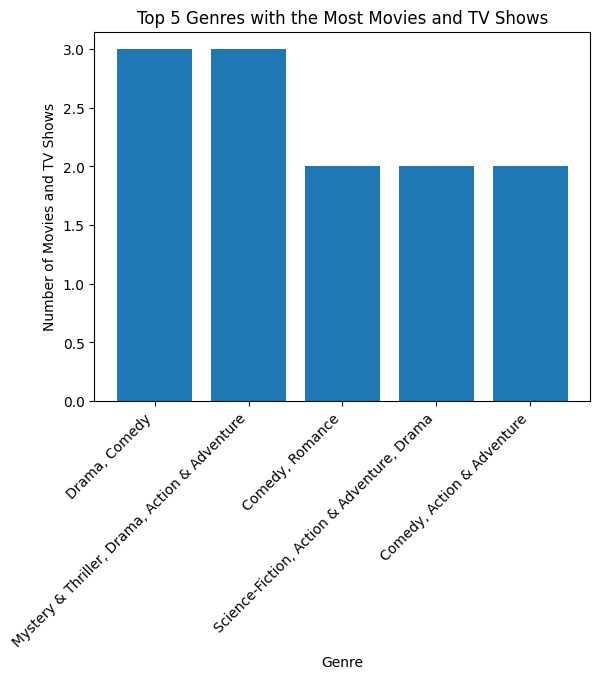

In [177]:
##Lets Visualize
import matplotlib.pyplot as plt
plt.bar(x =Top_5_genres_visulalize.index,height =Top_5_genres_visulalize.values)
plt.xlabel('Genre')
plt.ylabel('Number of Movies and TV Shows')
plt.title('Top 5 Genres with the Most Movies and TV Shows')
plt.xticks(rotation=45, ha='right')
plt.show()

### So we have **Drama,Action Adventure, Mystery Thriller,Comedy,Science Fiction, Crime** as some of the top Genres in Movies

In [ ]:
!pip install wordcloud

In [179]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

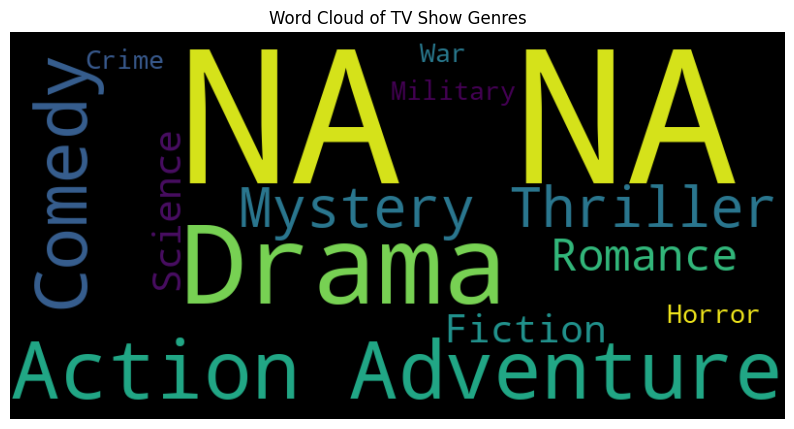

In [180]:
#Showing Top Genres in TV show using Word Cloud

# Extracting genres and joining them into a single string
all_genres_text = ', '.join(TV_Show_df['Genre'].fillna('').values)

# Creating a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='Black').generate(all_genres_text)

# Displaying the WordCloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of TV Show Genres')
plt.show()

## In Tv Shows also we can see that **Drame, Action Adventure, Mystery Thriller, Comedy, Science Fiction** are top

## **Finding Predominant Streaming Service**

In [181]:
##Counting Streaming Service
Streaming_service_counts = JustWatch_df['Streaming service'].value_counts().sort_values(ascending = False)

In [182]:
## Streaming Services name with their count
Streaming_service_counts

Streaming service
Amazon Prime Video            6
Netflix                       5
Hotstar                       2
Hotstar,aha                   1
NA                            1
Jio Cinema                    1
Jio Cinema,Alt Balaji         1
Amazon Prime Video,Netflix    1
Name: count, dtype: int64

Predominant Streaming service are **Amazon Prime Video** and **Netflix**

## **Task 3 :- Data Export**

In [183]:
#saving final dataframe as Final Data in csv format
JustWatch_df.to_csv('JustWatch Final Data.csv',index=False)